In [ ]:
mport warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

np.random.seed(10)
ar=np.zeros((10000,16),dtype=int)     #타입 안 정해주면 float 기본

ar[:,0]=np.arange(1,10001)     #id
ar[:,1]=np.random.randint(2,size=10000)        #gender
ar[:,2]=np.random.randint(10,91,size=10000)     #age
ar[:,3]=np.random.randint(1,11,size=10000)     #region
ar[:,4]=np.random.choice([11,22,33,44,55],10000)     #pdt_22 구매상품
ar[:,5]=np.random.choice([11,22,33,44,55],10000)     #pdt_23
ar[:,6]=np.random.randint(1,51,10000) * 1000     #pri_22 가격
ar[:,7]=np.random.randint(1,51,10000) * 1000     #pri_23
ar[:,8]=np.random.randint(1,21,10000)     #count_22 구매개수
ar[:,9]=np.random.randint(1,21,10000)     #count_23
ar[:,10]=np.random.randint(1,13,10000)     #time_22 가장 많이 구매한 시간대
ar[:,11]=np.random.randint(1,13,10000)     #time_23
ar[:,12]=np.random.randint(1,6,size=10000)     #channel 구매한 매장 유형
ar[:,13]=ar[:,6]*ar[:,8]     #pur_22 구매총합
ar[:,14]=ar[:,7]*ar[:,9]     #pur_23
ar[:,15]=np.where(ar[:,14]>ar[:,13], 1, 0)     #sales (구매액 증가:1)

############## 데이터프레임 생성 ##############
col=['id','gender','age','region','pdt_22','pdt_23','pri_22','pri_23','ct_22','ct_23',
    'mon_22','mon_23','channel','pur_22','pur_23','sales']

af=pd.DataFrame(ar, columns=col)
af=af.set_index('id')

af_org=af.copy()

############## NaN값 삽입 ##############
for i in range(len(af.iloc[0])-3):       #각 칼럼별 nan값 넣기(id, 구매액, 증감 제외)
    nan_c=random.sample(range(10000),10)
    for k in nan_c:
        af.iloc[k,i]=np.nan

af.isnull().sum()
df=af

In [ ]:
##### 나이 범주화 #####
def get_cate(age):
    cat=''
    if age<=19: cat='10대'
    elif age<=29: cat='20대'
    elif age<=39: cat='30대'
    elif age<=49: cat='40대'
    elif age<=59: cat='50대'
    elif age<=69: cat='60대'
    elif age<=79: cat='70대'
    elif age<=89: cat='80대'
    else: cat='90대'
    return cat

df['age_cat']=df.age.apply(lambda x: get_cate(x))

In [ ]:
df

,gender,age,region,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,mon_22,mon_23,channel,pur_22,pur_23,sales,age_cat
id,,,,,,,,,,,,,,,,
1,1.0,74.0,4.0,22.0,33.0,37000.0,46000.0,13.0,6.0,9.0,7.0,4.0,481000,276000,0,70대
2,1.0,65.0,2.0,44.0,44.0,11000.0,40000.0,11.0,9.0,12.0,2.0,1.0,121000,360000,1,60대
3,0.0,64.0,6.0,22.0,55.0,8000.0,35000.0,8.0,19.0,12.0,9.0,2.0,64000,665000,1,60대
4,1.0,80.0,2.0,44.0,33.0,9000.0,47000.0,5.0,12.0,3.0,9.0,3.0,45000,564000,1,80대
5,0.0,48.0,5.0,11.0,11.0,9000.0,20000.0,6.0,7.0,6.0,3.0,4.0,54000,140000,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,63.0,7.0,55.0,33.0,35000.0,6000.0,10.0,15.0,10.0,9.0,1.0,350000,90000,0,60대
9997,1.0,65.0,2.0,44.0,44.0,25000.0,5000.0,4.0,9.0,2.0,3.0,4.0,100000,45000,0,60대
9998,1.0,42.0,5.0,33.0,11.0,28000.0,16000.0,4.0,13.0,4.0,8.0,5.0,112000,208000,1,40대


In [ ]:
##### 발렌타인세트 구매자 중 1/3 -> 30대로 변경 #####
idx1 = df['pdt_22']==33
idx2 = df['age_cat'] != '30대'
bal=pd.DataFrame(df.age[idx1 & idx2])
bal[::3] = pd.DataFrame(np.random.randint(30,40,len(bal[::3])))
df.age[idx1 & idx2]=bal.age

idx1 = df['pdt_23']==33
idx2 = df['age_cat'] != '30대'
bal=pd.DataFrame(df.age[idx1 & idx2])
bal[::3] = pd.DataFrame(np.random.randint(30,40,len(bal[::3])))
df.age[idx1 & idx2]=bal.age

df['age_cat']=df.age.apply(lambda x: get_cate(x))


In [ ]:
##### 2월, 3월, 12월 가중치 #####
idx1 = df['mon_22']==2
idx2 = df['mon_22']==3
idx3 = df['mon_22']==12
df.ct_22[idx1 | idx2 | idx3] +=20

idx1 = df['mon_23']==2
idx2 = df['mon_23']==3
idx3 = df['mon_23']==12
df.ct_23[idx1 | idx2 | idx3] +=20

In [ ]:
##### 팝업스토어 2,3,12월 가중치 #####
idx1 = df['channel']==2
idx2 = (df['mon_22']==2) | (df['mon_22']==3) | (df['mon_22']==12)
idx3 = (df['mon_22']==2) & (df['mon_22']==3) & (df['mon_22']==12)
df.ct_22[idx1 & idx2] +=20
df.ct_22[idx3] = (df.ct_22[idx3]//2) +1

idx1 = df['channel']==2
idx2 = (df['mon_23']==2) | (df['mon_23']==3) | (df['mon_23']==12)
idx3 = (df['mon_23']==2) & (df['mon_23']==3) & (df['mon_23']==12)
df.ct_23[idx1 & idx2] +=20
df.ct_23[idx3] = (df.ct_23[idx3]//2) +1

In [ ]:
##### 인터넷, 편의점 구매자 가중치 #####
idx1 = df['channel']==1
df.ct_22[idx1] +=20
df.ct_23[idx1] +=20

idx1 = df['channel']==5
df.ct_22[idx1] +=10
df.ct_23[idx1] +=10

In [ ]:
##### 10,20,30대 가중치+ #####
##### 60,70,80,90대 가중치- #####
idx1 = df['age_cat']=='10대'
df.ct_22[idx1] +=10
df.ct_23[idx1] +=10

idx2 = df['age_cat']=='20대'
idx3 = df['age_cat']=='30대'
df.ct_22[idx2 | idx3] +=20
df.ct_23[idx2 | idx3] +=20

idx1 = df['age_cat']=='60대'
idx2 = df['age_cat']=='70대'
idx3 = df['age_cat']=='80대'
idx4 = df['age_cat']=='90대'
df.ct_22[idx1 | idx2 | idx3 | idx4] = (df.ct_22[idx1 | idx2 | idx3 | idx4] // 3) +1
df.ct_23[idx1 | idx2 | idx3 | idx4] = (df.ct_23[idx1 | idx2 | idx3 | idx4] // 3) +1

In [ ]:
##### 구매감소 고객: 남성이 더 많음 #####
# (여성 감소 고객 일부를 남성으로 변경)
idx1 = df['gender']==1
idx2 = df['sales']==0
bal=pd.DataFrame(df.gender[idx1 & idx2])
bal[::3] = pd.DataFrame([0 for i in range(len(bal[::3]))])
df.gender[idx1 & idx2]=bal.gender

In [ ]:
##### 22년 매출 > 23년 매출 #####
df.ct_22 += 5    #22년도 구매개수 증가시킴

In [ ]:
# 구매액 = 구매개수*상품가격
df.pur_22=df.ct_22*df.pri_22
df.pur_23=df.ct_23*df.pri_23

In [ ]:
# nan값 처리/ 각 상품에 맞는 가격 삽입/ 데이터 타입변경
df.dropna(subset=['pdt_22', 'pdt_23', 'ct_22', 'ct_23', 'pur_22', 'pur_23'], axis=0, inplace=True)
df.age.replace(np.nan, 0, inplace=True)

price_dict = {11: 3000, 22: 10000, 33: 50000, 44: 30000, 55: 9000}
df['pri_22'] = df['pdt_22'].map(price_dict)
df['pri_23'] = df['pdt_23'].map(price_dict)

df['ct_22']=df['ct_22'].astype('int')
df['ct_23']=df['ct_23'].astype('int')
df['pri_22']=df['pri_22'].astype('int')
df['pri_23']=df['pri_23'].astype('int')
df['pur_22']=df['pur_22'].astype('int')
df['pur_23']=df['pur_23'].astype('int')

In [ ]:
# 데이터명 수정/ 매출 총액, 전년대비 매출 증감폭 칼럼 추가/ 안 쓰는 칼럼 삭제
df.gender.replace({0:'남성',1:'여성', np.nan:'정보없음'}, inplace=True)
df.mon_22.replace({1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',7:'7월',8:'8월',9:'9월',10:'10월',11:'11월',12:'12월', np.nan:'정보없음'}, inplace=True)
df.mon_23.replace({1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',7:'7월',8:'8월',9:'9월',10:'10월',11:'11월',12:'12월', np.nan:'정보없음'}, inplace=True)
df['pdt_22'].replace({11:'과일맛사탕세트',22:'카라멜세트',33:'발렌타인세트',44:'초콜릿세트',55:'젤리세트'}, inplace=True)
df['pdt_23'].replace({11:'과일맛사탕세트',22:'카라멜세트',33:'발렌타인세트',44:'초콜릿세트',55:'젤리세트'}, inplace=True)
df.channel.replace({1:'인터넷',2:'팝업스토어',3:'백화점',4:'할인마트',5:'편의점',np.nan:'기타'}, inplace=True)

df.insert(14,'pur_all', df.pur_22 + df.pur_23)
df.insert(15,'pur_gap', abs(df.pur_23 - df.pur_22))

df=df.drop('region',axis=1)

In [ ]:
df.isnull().sum()

gender     0
age        0
pdt_22     0
pdt_23     0
pri_22     0
pri_23     0
ct_22      0
ct_23      0
mon_22     0
mon_23     0
channel    0
pur_22     0
pur_23     0
pur_all    0
pur_gap    0
sales      0
age_cat    0
dtype: int64

In [ ]:
df.corr()

,age,pri_22,pri_23,ct_22,ct_23,pur_22,pur_23,pur_all,pur_gap,sales
age,1.000000,-0.076730,-0.077941,-0.653715,-0.655729,-0.438133,-0.472830,-0.557764,-0.391007,-0.002588
pri_22,-0.076730,1.000000,0.009971,0.122668,0.098177,0.070632,0.070892,0.086745,0.038906,-0.004570
pri_23,-0.077941,0.009971,1.000000,0.116729,0.098618,0.084487,0.072822,0.096633,0.076223,0.002032
ct_22,-0.653715,0.122668,0.116729,1.000000,0.692132,0.676102,0.500283,0.724227,0.531544,-0.090597
ct_23,-0.655729,0.098177,0.098618,0.692132,1.000000,0.461461,0.721715,0.720581,0.468665,0.088563
pur_22,-0.438133,0.070632,0.084487,0.676102,0.461461,1.000000,0.330202,0.827356,0.552133,-0.322455
pur_23,-0.472830,0.070892,0.072822,0.500283,0.721715,0.330202,1.000000,0.803368,0.396160,0.299195
pur_all,-0.557764,0.086745,0.096633,0.724227,0.720581,0.827356,0.803368,1.000000,0.584059,-0.025389
pur_gap,-0.391007,0.038906,0.076223,0.531544,0.468665,0.552133,0.396160,0.584059,1.000000,-0.123384
sales,-0.002588,-0.004570,0.002032,-0.090597,0.088563,-0.322455,0.299195,-0.025389,-0.123384,1.000000


In [ ]:
df.pur_23.describe()

count    9.940000e+03
mean     6.470869e+05
std      6.612285e+05
min      1.000000e+03
25%      1.500000e+05
50%      4.060000e+05
75%      9.500000e+05
max      3.950000e+06
Name: pur_23, dtype: float64

In [ ]:
df

,gender,age,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,mon_22,mon_23,channel,pur_22,pur_23,pur_all,pur_gap,sales,age_cat
id,,,,,,,,,,,,,,,,,
1,남성,35.0,카라멜세트,발렌타인세트,10000,50000,38,26,9월,7월,할인마트,1406000,1196000,2602000,210000,0,30대
2,여성,65.0,초콜릿세트,초콜릿세트,30000,30000,23,17,12월,2월,인터넷,253000,680000,933000,427000,1,60대
3,남성,64.0,카라멜세트,젤리세트,10000,9000,22,7,12월,9월,팝업스토어,176000,245000,421000,69000,1,60대
4,여성,80.0,초콜릿세트,발렌타인세트,30000,50000,14,5,3월,9월,백화점,126000,235000,361000,109000,1,80대
5,남성,48.0,과일맛사탕세트,과일맛사탕세트,3000,3000,11,27,6월,3월,할인마트,99000,540000,639000,441000,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,남성,63.0,젤리세트,발렌타인세트,9000,50000,16,12,10월,9월,인터넷,560000,72000,632000,488000,0,60대
9997,여성,65.0,초콜릿세트,초콜릿세트,30000,30000,14,10,2월,3월,할인마트,350000,50000,400000,300000,0,60대
9998,여성,42.0,발렌타인세트,과일맛사탕세트,50000,3000,19,23,4월,8월,편의점,532000,368000,900000,164000,1,40대


In [ ]:
##### 구매형태별 매출액 #####
channel = df.groupby(['channel'])
ch = channel.agg({'pur_all':['sum','mean']}).round(1)

ch
# 인터넷, 편의점, 팝업스토어 순으로 매출이 높음

pur_all           
                  sum       mean
channel                         
기타       6.913000e+06   691300.0
백화점      2.120122e+09  1112341.0
인터넷      3.828147e+09  1940267.1
팝업스토어    2.698015e+09  1351034.1
편의점      3.107969e+09  1529512.3
할인마트     2.327555e+09  1151115.2

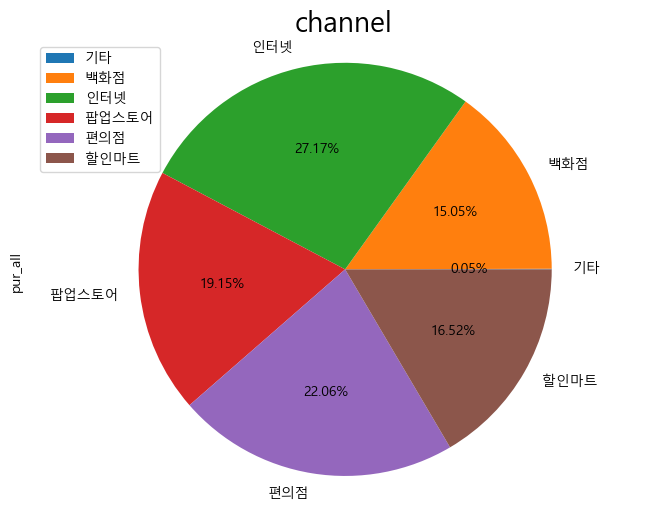

In [ ]:
df_channel=df.groupby('channel').sum()
df_channel


df_channel.pur_all.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('channel', size=20)
plt.axis('equal')
plt.legend(labels=df_channel.index, loc='best')

In [ ]:
##### 각 연령대별 상품 구매개수, 매출액(총합/평균) + 구매한 인원 수(sales-count) #####
age_pdt22 = df.groupby(['age_cat','pdt_22'])
ap22 = age_pdt22.agg({'ct_22':'sum', 'pur_22':['sum','mean'], 'sales':'count'}).round(1)

age_pdt23 = df.groupby(['age_cat','pdt_23'])
ap23 = age_pdt23.agg({'ct_23':'sum', 'pur_23':['sum','mean'], 'sales':'count'}).round(1)

ap23


# 10,20,30대에서 전체적으로 인원수 대비 구매율이 높음
# 30대에서 특히 발렌타인세트가 많이 팔림
# 구매자 수는 20,30대가 가장 많음
# 60대 이상부턴 구매인원 수에 비해 매출액(평균)이 급하락하는 추세

ct_23     pur_23            sales
                   sum        sum       mean count
age_cat pdt_23                                    
10대     과일맛사탕세트   7454  209410000   939058.3   223
        발렌타인세트    4753  124535000   835805.4   149
        젤리세트      8053  200781000   847177.2   237
        초콜릿세트     8261  200430000   776860.5   258
        카라멜세트     6495  170252000   859858.6   198
20대     과일맛사탕세트   9320  250237000  1142634.7   219
        발렌타인세트    6234  143553000  1018106.4   141
        젤리세트     10168  259864000  1115296.1   233
        초콜릿세트     9075  227673000  1044371.6   218
        카라멜세트     9225  226645000  1039656.0   218
30대     과일맛사탕세트  14670  367101000  1054887.9   348
        발렌타인세트   36833  956999000  1074073.0   891
        젤리세트     15670  411086000  1123185.8   366
        초콜릿세트    15574  390764000  1047624.7   373
        카라멜세트    15205  352482000   992907.0   355
40대     과일맛사탕세트   4810  126672000   555578.9   228
        발렌타인세트    4023   97625000   536401.1   182
        젤리세트      5491  135444000   557382.7   243
        초콜릿세트     5749  136731000   542583.3   252
        카라멜세트     5016  126842000   539753.2   235
50대     과일맛사탕세트   5021  116297000   519183.0   224
        발렌타인세트    3067   86066000   642283.6   134
        젤리세트      4595  119105000   556565.4   214
        초콜릿세트     5415  152424000   689701.4   221
        카라멜세트     6151  158659000   672283.9   236
60대     과일맛사탕세트   1734   44029000   201967.9   218
        발렌타인세트    1249   30656000   192805.0   159
        젤리세트      2013   52302000   204304.7   256
        초콜릿세트     1946   49823000   205032.9   243
        카라멜세트     2104   55020000   209201.5   263
70대     과일맛사탕세트   1936   47972000   199883.3   240
        발렌타인세트     988   25623000   210024.6   122
        젤리세트      1645   41602000   187396.4   222
        초콜릿세트     1942   47020000   191138.2   246
        카라멜세트     2045   51051000   210086.4   243
80대     과일맛사탕세트   1903   45537000   203290.2   224
        발렌타인세트    1163   31841000   210867.5   151
        젤리세트      1754   43827000   212752.4   206
        초콜릿세트     2003   48053000   203614.4   236
        카라멜세트     1764   50535000   235046.5   215
90대     과일맛사탕세트    161    3456000   172800.0    20
        발렌타인세트     135    3100000   163157.9    19
        젤리세트       201    5481000   274050.0    20
        초콜릿세트      192    4826000   185615.4    26
        카라멜세트       90    2613000   174200.0    15

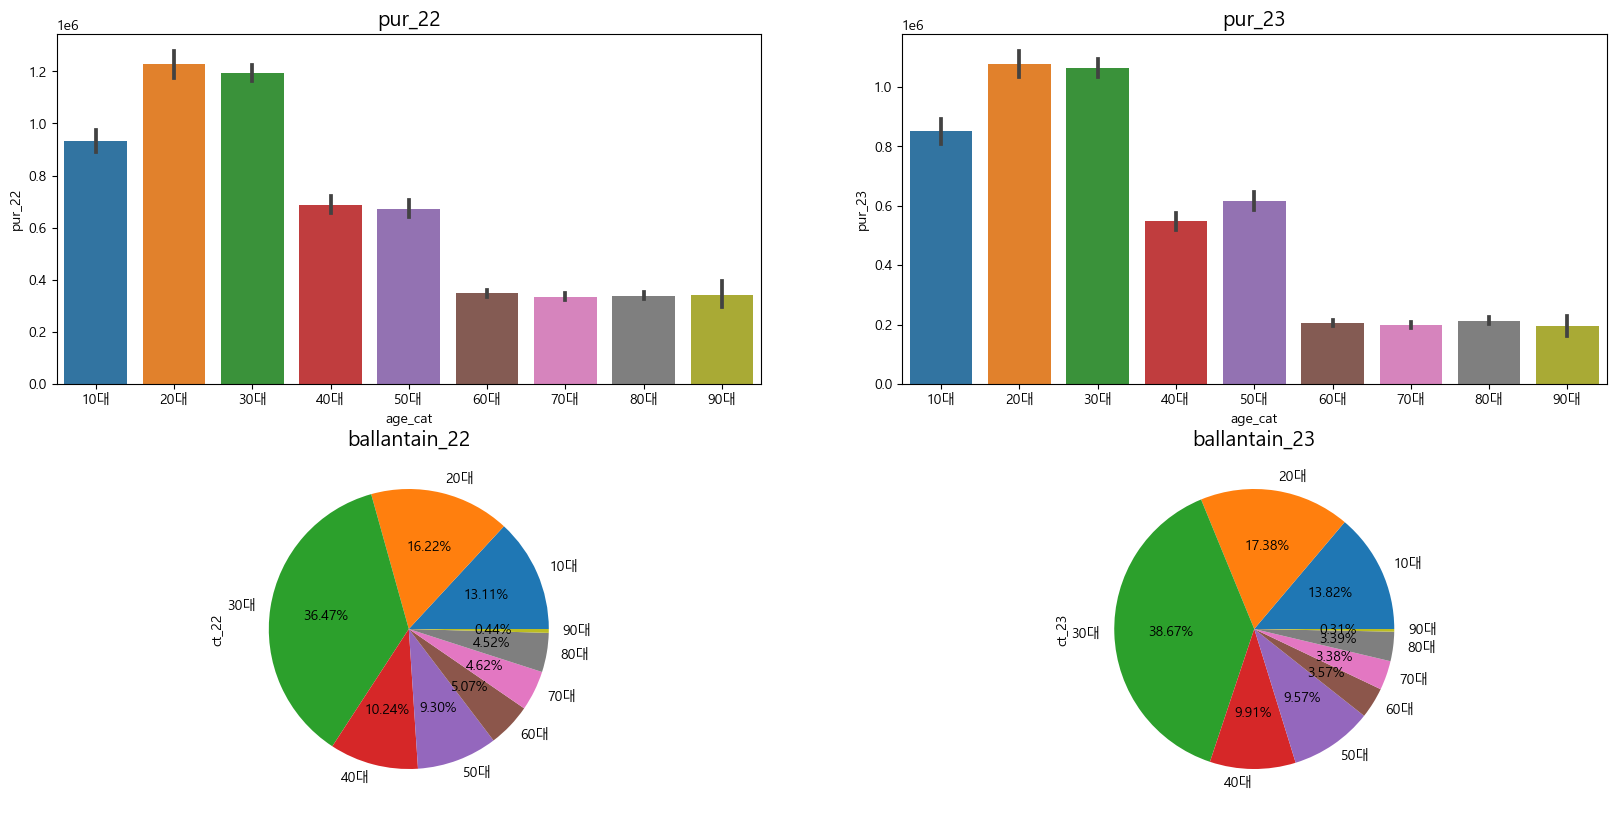

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.barplot(x='age_cat', y='pur_22', order=['10대', '20대','30대','40대','50대','60대','70대','80대','90대'], data=df, ax=axes[0, 0])
axes[0, 0].set_title('pur_22', size=15)

sns.barplot(x='age_cat', y='pur_23', order=['10대', '20대','30대','40대','50대','60대','70대','80대','90대'], data=df, ax=axes[0, 1])
axes[0, 1].set_title('pur_23', size=15)

df.groupby('age_cat').sum().ct_22.plot(kind='pie', autopct='%.2f%%', startangle=0, ax=axes[1, 0])
axes[1, 0].set_title('ballantain_22', size=15)

df.groupby('age_cat').sum().ct_23.plot(kind='pie', autopct='%.2f%%', startangle=0, ax=axes[1, 1])
axes[1, 1].set_title('ballantain_23', size=15)

plt.show()


In [ ]:
##### 월별 매출액 #####
mons22 = df.groupby(['mon_22'])
mo22 = mons22.agg({'pur_22':['sum','mean']}).round(1)

mons23 = df.groupby(['mon_23'])
mo23 = mons23.agg({'pur_23':['sum','mean']}).round(1)

mo22
mo23
# 2,3,12월 매출이 평소보다 거의 2배
# 매출 평균도 높음

pur_23           
              sum       mean
mon_23                      
10월     399610000   493955.5
11월     468736000   538158.4
12월     809495000  1020800.8
1월      418094000   516803.5
2월      845508000  1036161.8
3월      846507000   991226.0
4월      407584000   513977.3
5월      420286000   528661.6
6월      440968000   523093.7
7월      438150000   531735.4
8월      463844000   531931.2
9월      468495000   550522.9
정보없음      4767000   476700.0

<AxesSubplot:xlabel='mon_22', ylabel='pur_22'>

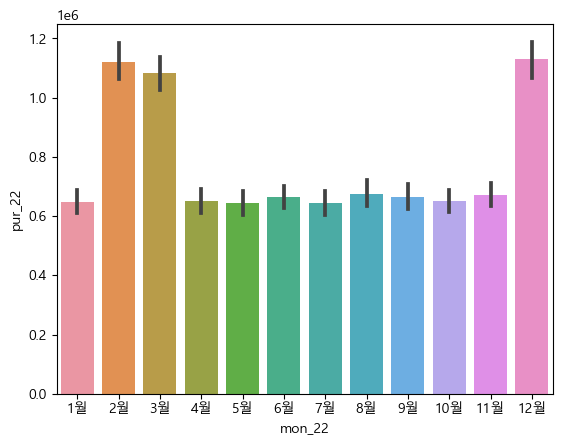

In [ ]:
#월별 판매액 그래프
sns.barplot(x='mon_22', y='pur_22', order=['1월', '2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'], data=df)
# sns.barplot(x='mon_23', y='pur_23', order=['1월', '2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'], data=df)

In [ ]:
##### 월별 매출액 추이, 구매형태 #####
mons22 = df.groupby(['channel','mon_22'])
mo22 = mons22.agg({'pur_22':['sum','mean']}).round(1)
mo22

# 팝업스토어는 전체 매출에 비해 각 월별 매출액은 적은 편(거의 절반 수준)
# 단 12,2,3월 매출이 높아 전체 평균이 올라간 케이스 (다른 월에 비해 3~4배)

pur_22          
                      sum      mean
channel mon_22                     
기타      1월         774000  774000.0
        2월         972000  972000.0
        3월         886000  443000.0
        4월         100000  100000.0
        5월         558000  279000.0
...                   ...       ...
할인마트    5월       83822000  493070.6
        6월       93033000  505614.1
        7월       91914000  560451.2
        8월       93471000  580565.2
        9월      101291000  653490.3

[72 rows x 2 columns]

In [ ]:
##### 구매 감소 고객_성별 #####
gen = df.groupby(['sales','gender'])
gen_m = gen.agg({'pur_gap':'mean', 'gender':'count'}).round(1)
gen_m

# 구매 증가 고객의 경우 남녀 비율이 비슷한 편
# 그러나 구매 감소 고객의 경우 남성 비율이 훨씬 높음
# 구매 감소폭이 증가폭보다 높음 (22년 대비 23년 매출 하락)

pur_gap  gender
sales gender                  
0     남성      631801.1    3278
      여성      635791.9    1682
      정보없음    437600.0       5
1     남성      486993.9    2474
      여성      499837.8    2497
      정보없음    212250.0       4

<AxesSubplot:xlabel='gender', ylabel='pur_all'>

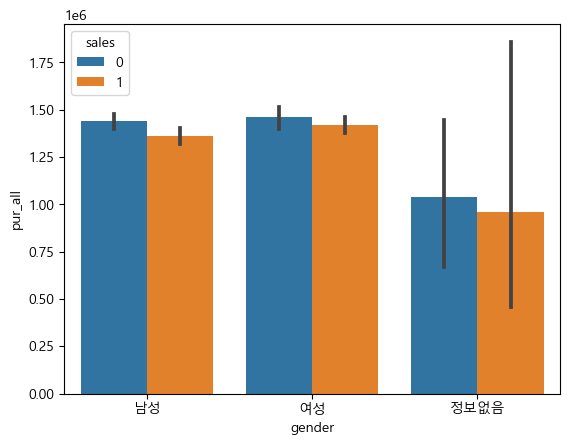

In [ ]:
sns.barplot(x='gender', y='pur_all', data=df, hue = 'sales', )

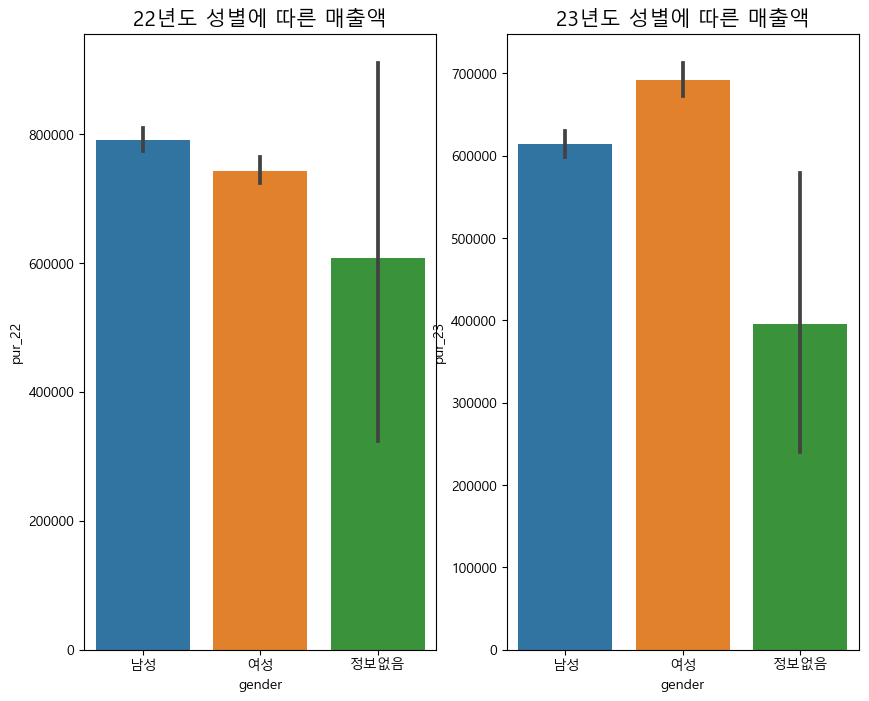

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.barplot(x='gender', y='pur_22', data=df, ax=axes[0])
axes[0].set_title('22년도 성별에 따른 매출액', size=15)
sns.barplot(x='gender', y='pur_23', data=df, ax=axes[1])
axes[1].set_title('23년도 성별에 따른 매출액', size=15)

plt.show()
